In [ ]:
"""
1.语音信号读写,语音信号的基本特征
2.抽取内插滤波
3.信号加噪和信噪比统计
::录制一段语音，读取、画出信号波形和功率谱
::自学：语音信号写入文件
::根据抽样率从高倍采集得到的信号中抽取
::抗混叠滤波
::::方法1: 用APP构造滤波器
::::::在python中导入.mat文件
::::::用scipy.io.loadmat()函数读取.mat文件
或者
::::::用scipy.signal.firwin()函数设计滤波器
::::::用scipy.signal.lfilter()函数实现滤波
"""

In [1]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
import scipy.signal as signal
import scipy.io as io

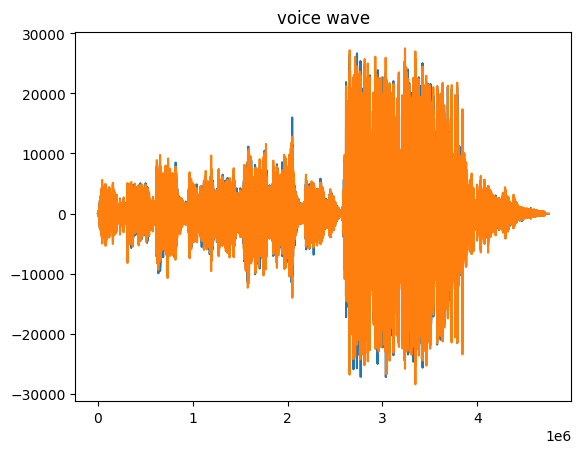

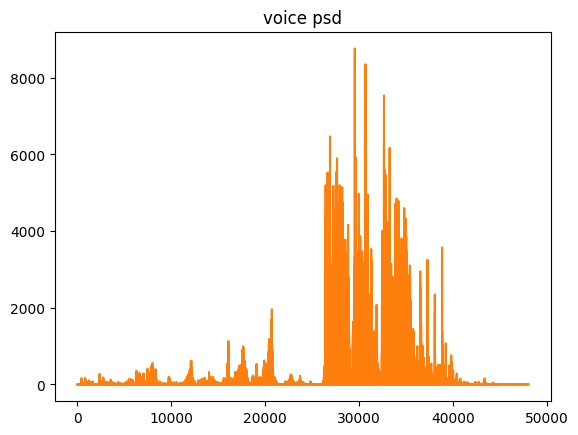

In [4]:
# 读取、画出信号波形和功率谱
# 读取语音信号
# win下读取wav文件
rate, data = wav.read('C:\\Users\\88486\\Desktop\\WorkSpace\\Up&Load\\通信原理\\suno.wav')

# 画出信号波形
plt.figure()
plt.plot(data)
plt.title('voice wave')
plt.show()

# 计算功率谱
"""
f:返回的频率数组;
Pxx:对应每个频率点的功率谱密度值。
"""
f, Pxx = signal.periodogram(data, rate)
# 公式计算功率谱:
data_FFT=np.fft.fft(data)
Pf=abs(data_FFT)**2/len(data)
f=np.linspace(0,rate,len(data))

# 画出功率谱
plt.figure()
plt.plot(f, Pxx)
plt.title('voice psd')
plt.show()
